# Radio Composite Augmentation Demonstration
This work calls on astroaugmentations.py and the classes therein.
In order each augmentation has a chance to be applied. The order is:
- Superpixel spectral index change 
- Brightness perspective distortion
- ElasticTransform
- ShiftScaleRotate
- VerticalFlip
- Spectral index change of whole image
- Emboss
- Dirty beam convlolution
- Brightness perspective distortion
- ShiftScaleRotate
- CenterCrop
- ToTensor

In [1]:
# Transformations
import albumentations as A
import astroaugmentations as AA
from albumentations.pytorch import ToTensorV2

# Data set
import torch
from datasets.MiraBest_F import MBFRFull

# Basics
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Example transformation:
kernel = np.load("./data/VLA_kernel.npy")
transform = AA.AstroAugmentations(domain="radio", kernel=kernel, p=0.5)
train = MBFRFull(root="./data", train=True, download=True, test_size=0.97, transform=transform())#.load_custom_data()
lims = [0,1]

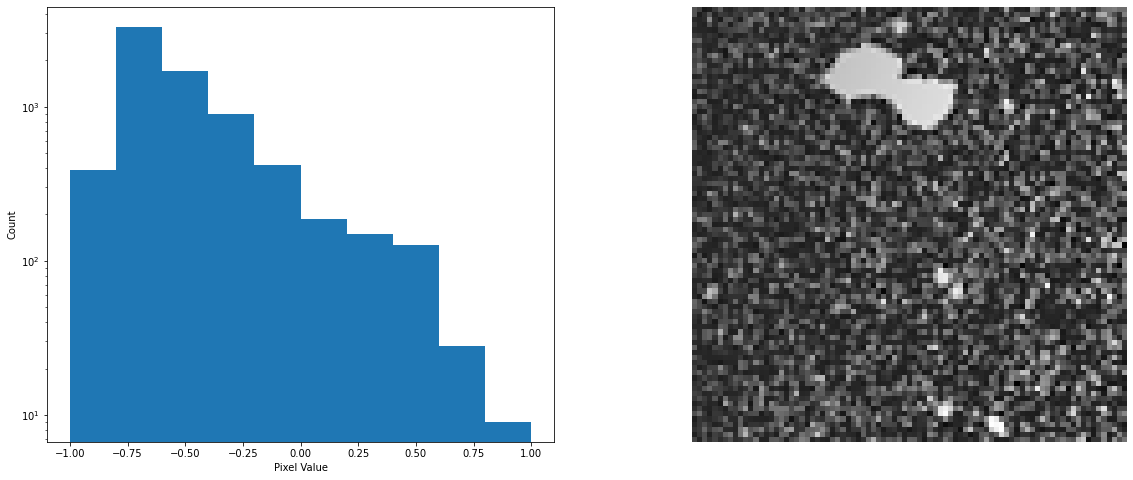

maxima of each image: [1.0]
minima of each image: [-1.0]


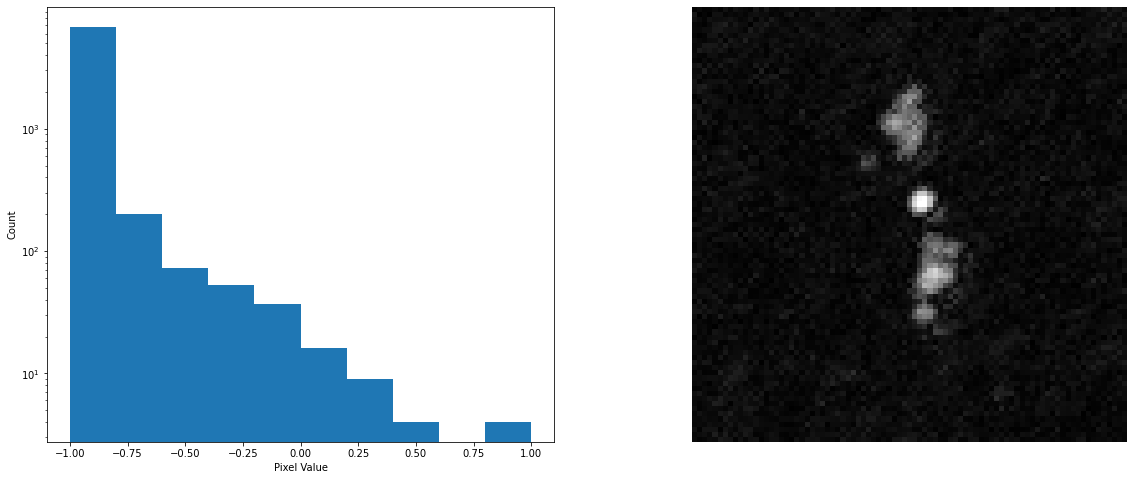

maxima of each image: [1.0]
minima of each image: [-1.0]


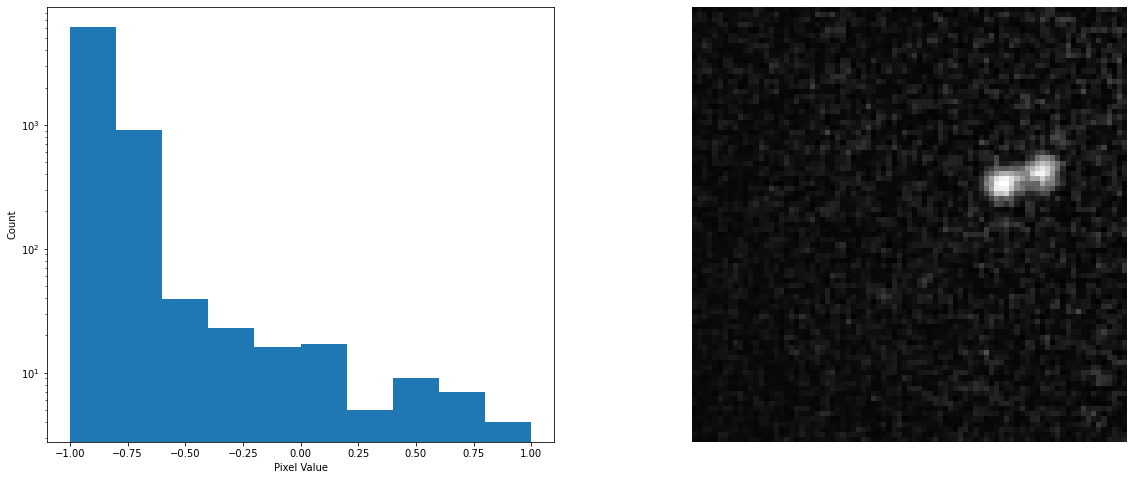

maxima of each image: [1.0]
minima of each image: [-1.0]


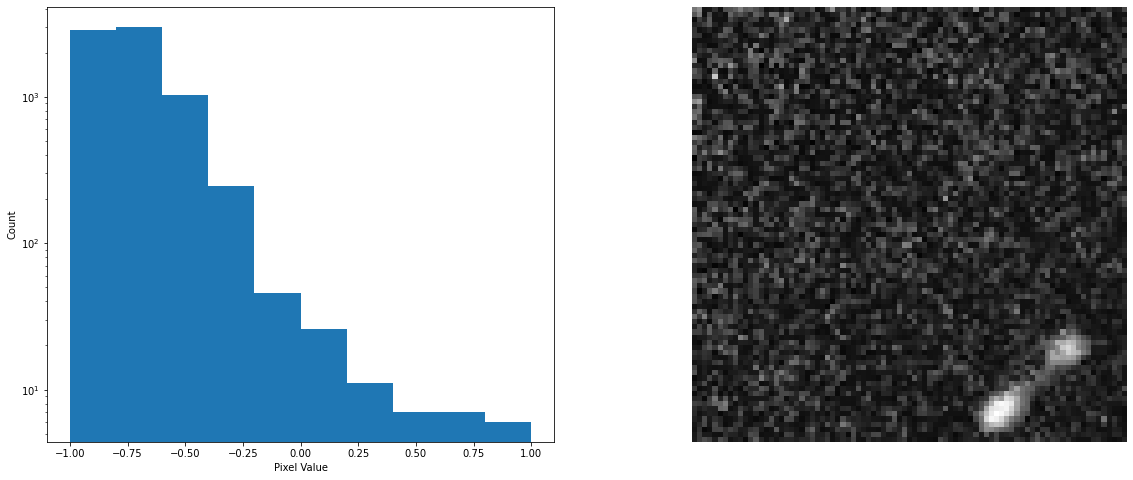

maxima of each image: [1.0]
minima of each image: [-1.0]


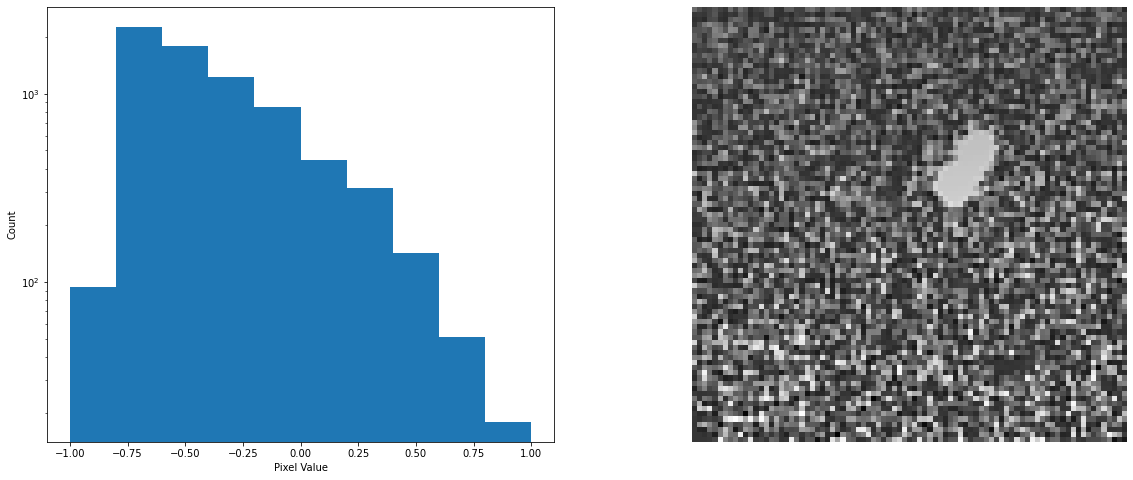

maxima of each image: [1.0]
minima of each image: [-1.0]


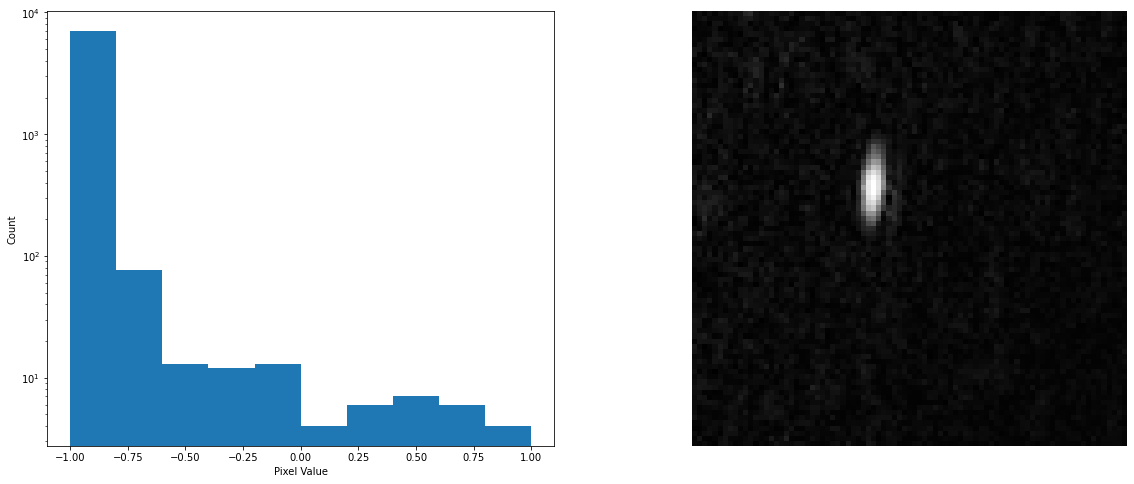

maxima of each image: [1.0]
minima of each image: [-1.0]


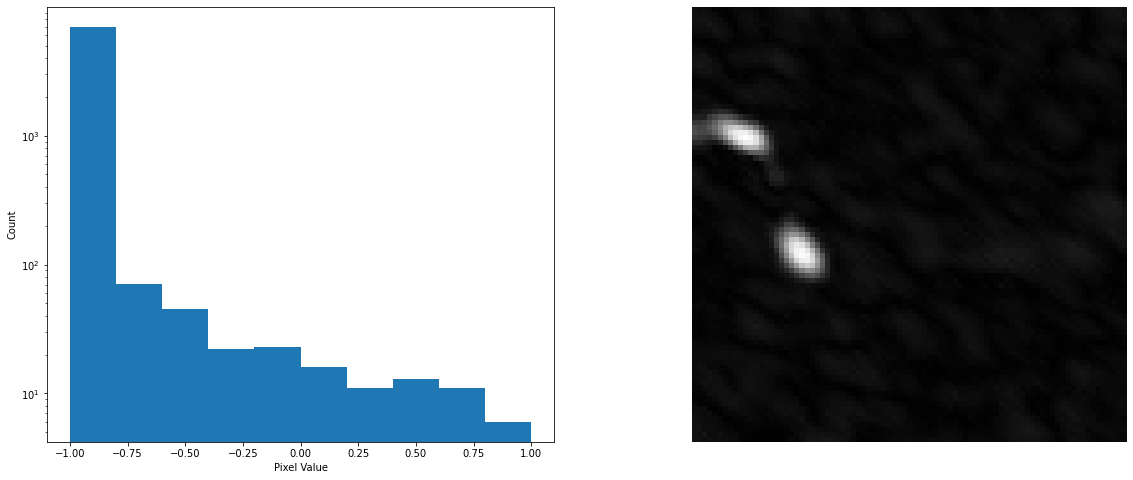

maxima of each image: [1.0]
minima of each image: [-1.0]


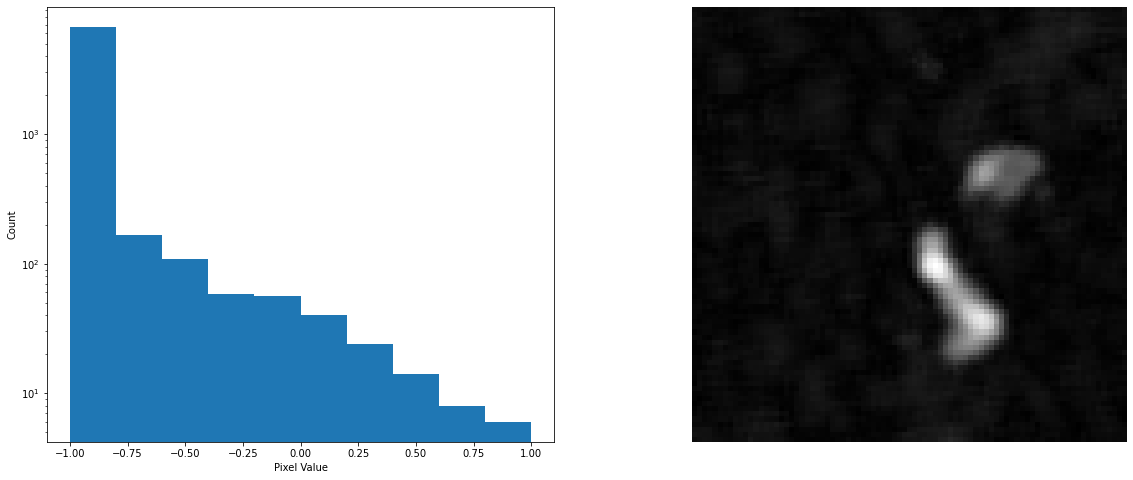

maxima of each image: [1.0]
minima of each image: [-1.0]


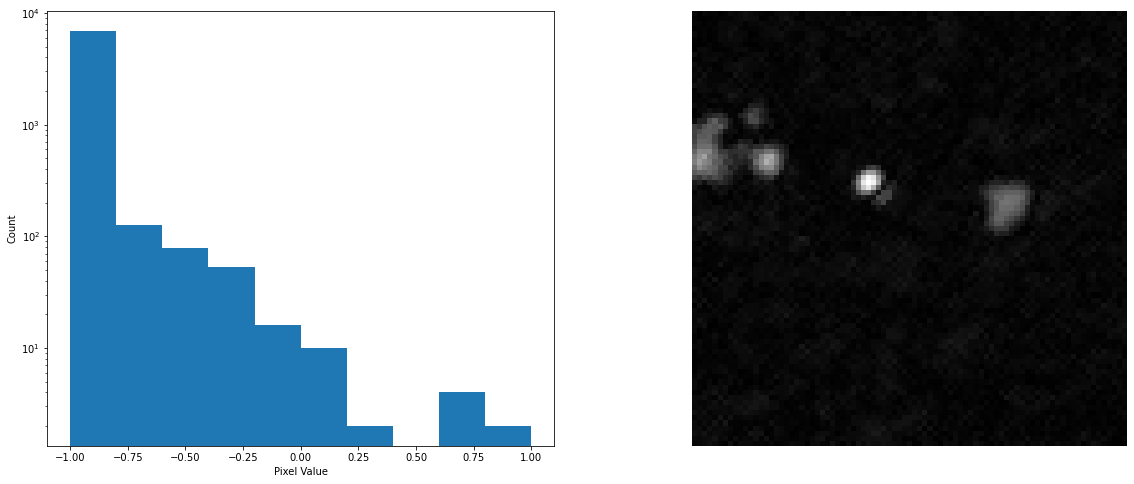

maxima of each image: [1.0]
minima of each image: [-1.0]


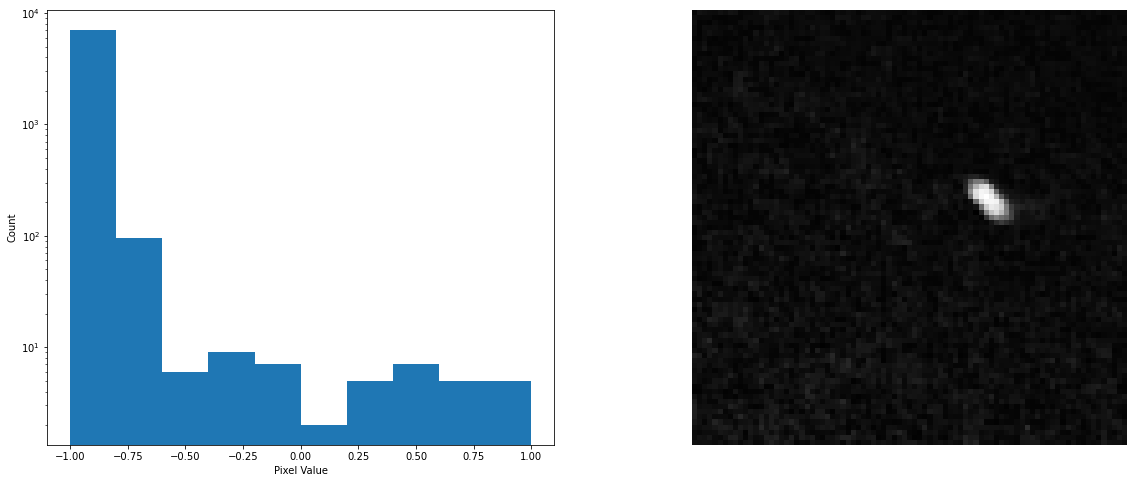

maxima of each image: [1.0]
minima of each image: [-1.0]


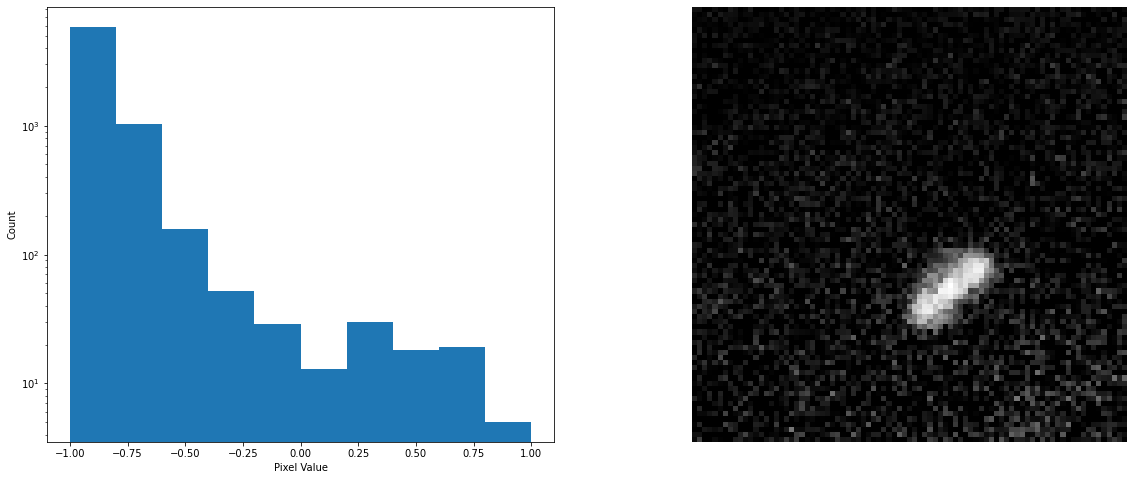

maxima of each image: [1.0]
minima of each image: [-1.0]


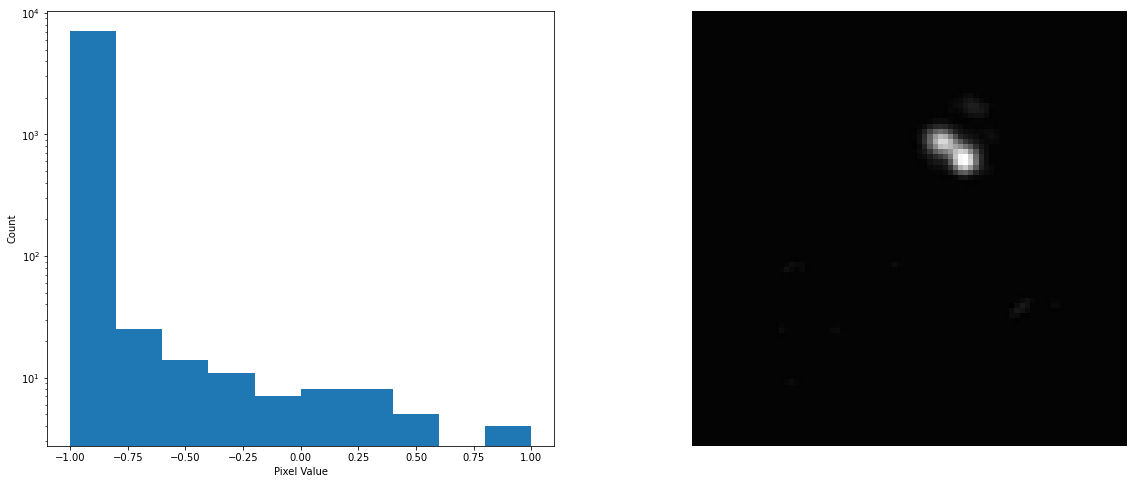

maxima of each image: [1.0]
minima of each image: [-1.0]


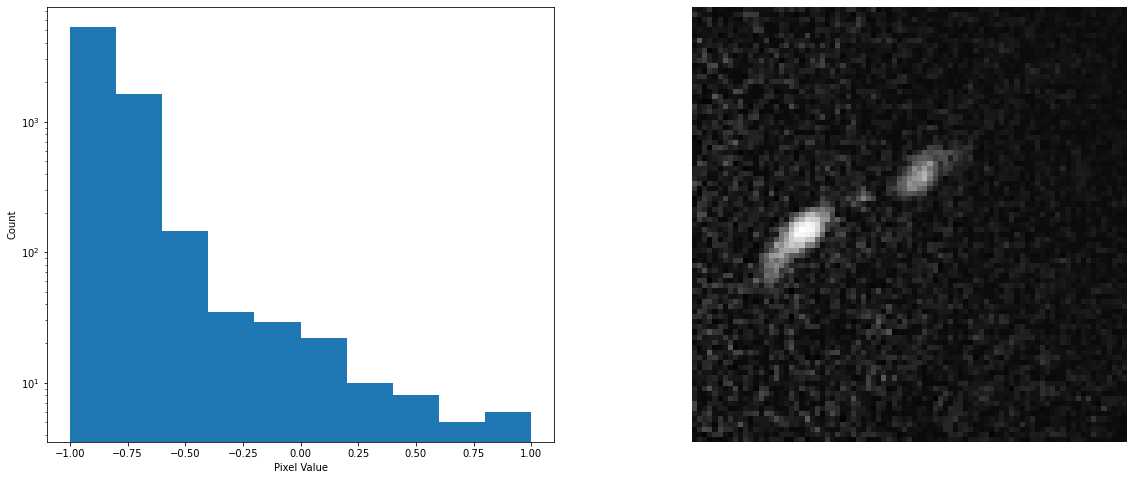

maxima of each image: [1.0]
minima of each image: [-1.0]


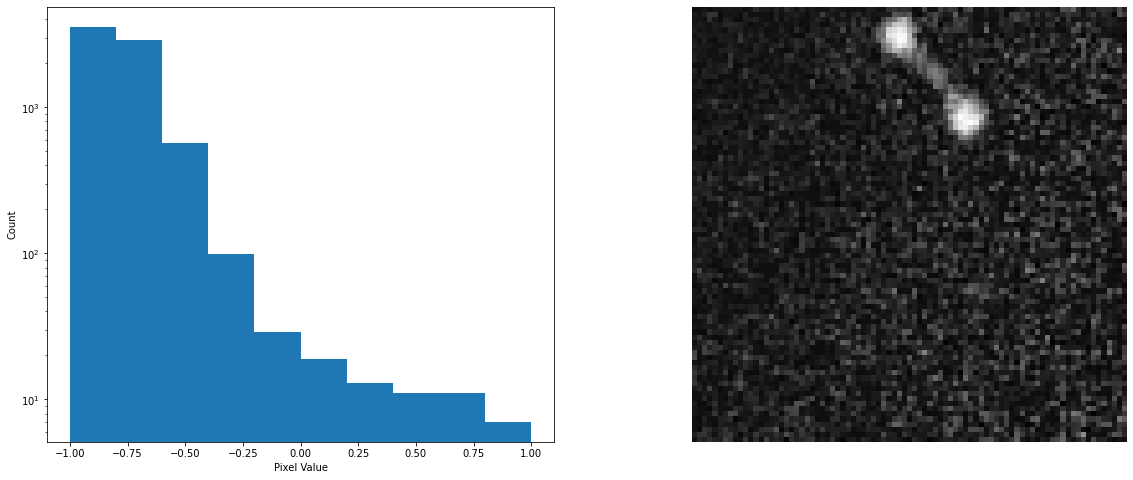

maxima of each image: [1.0]
minima of each image: [-1.0]


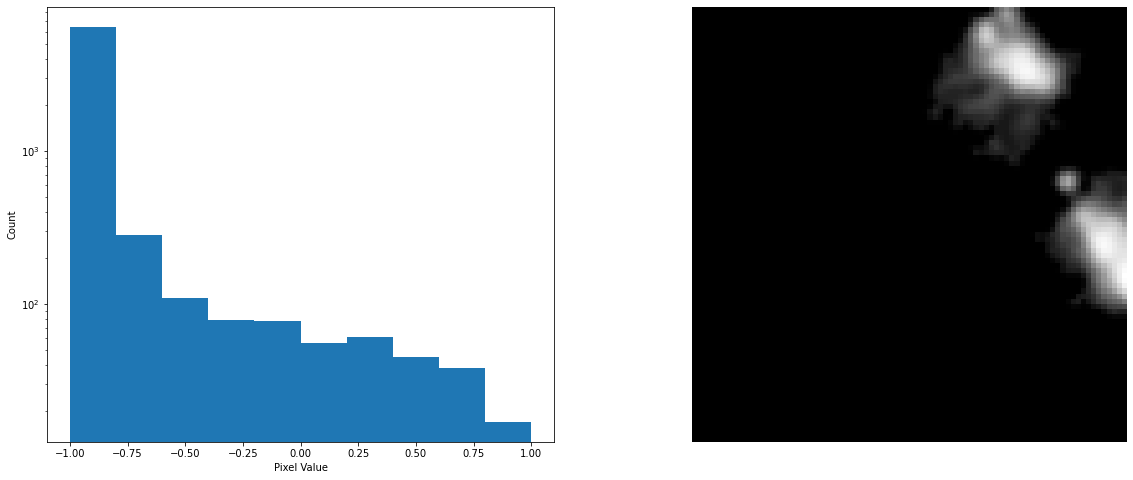

maxima of each image: [1.0]
minima of each image: [-1.0]


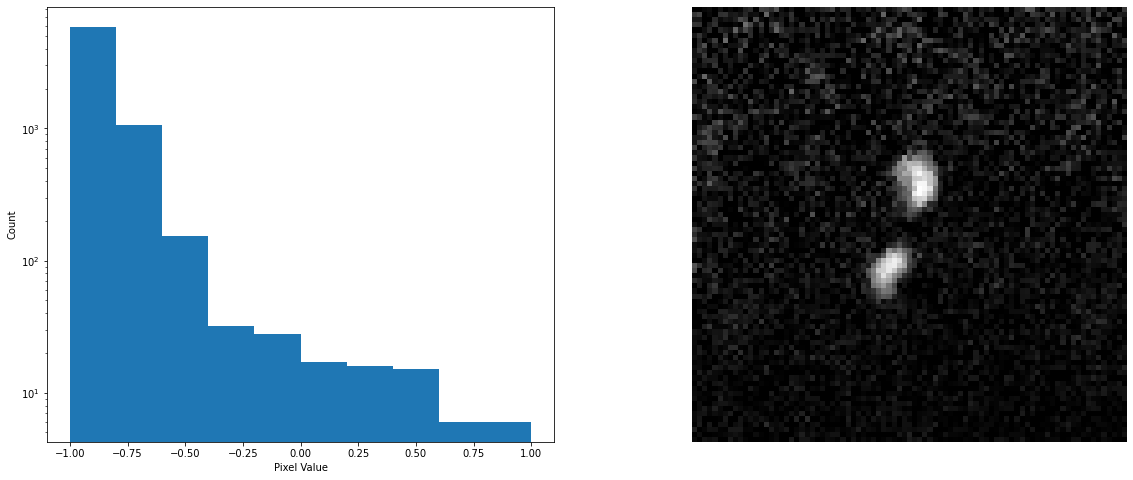

maxima of each image: [1.0]
minima of each image: [-1.0]


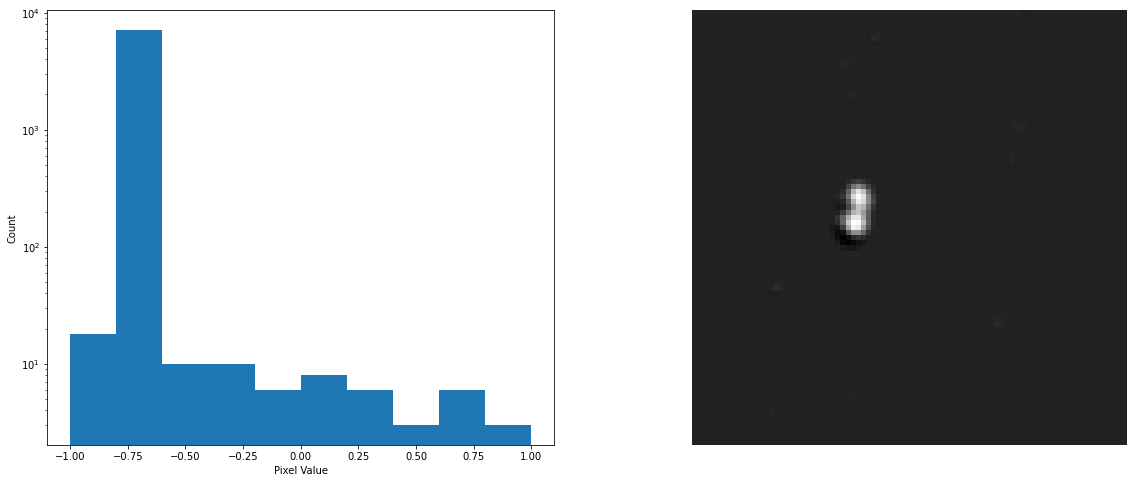

maxima of each image: [1.0]
minima of each image: [-1.0]


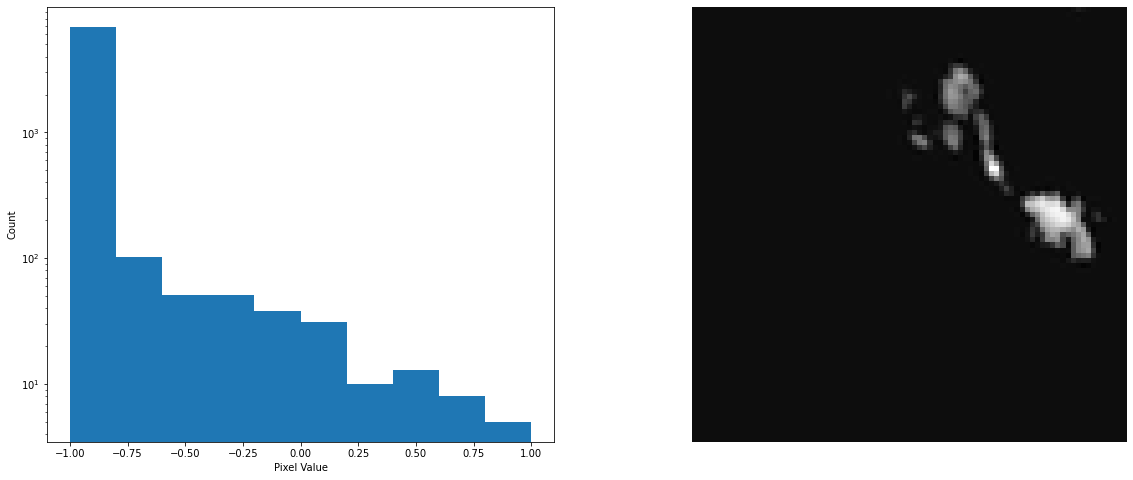

maxima of each image: [1.0]
minima of each image: [-1.0]


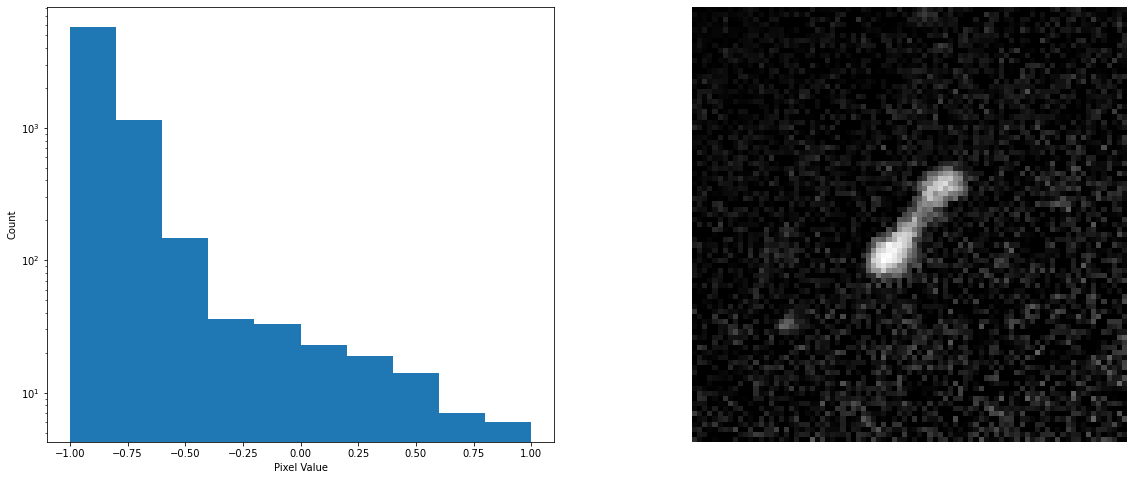

maxima of each image: [1.0]
minima of each image: [-1.0]


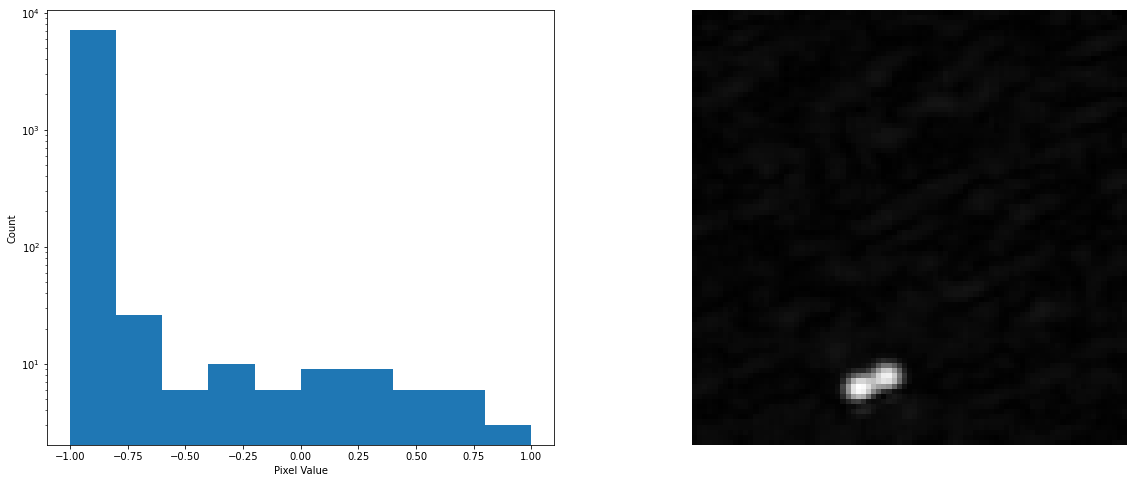

maxima of each image: [1.0]
minima of each image: [-1.0]


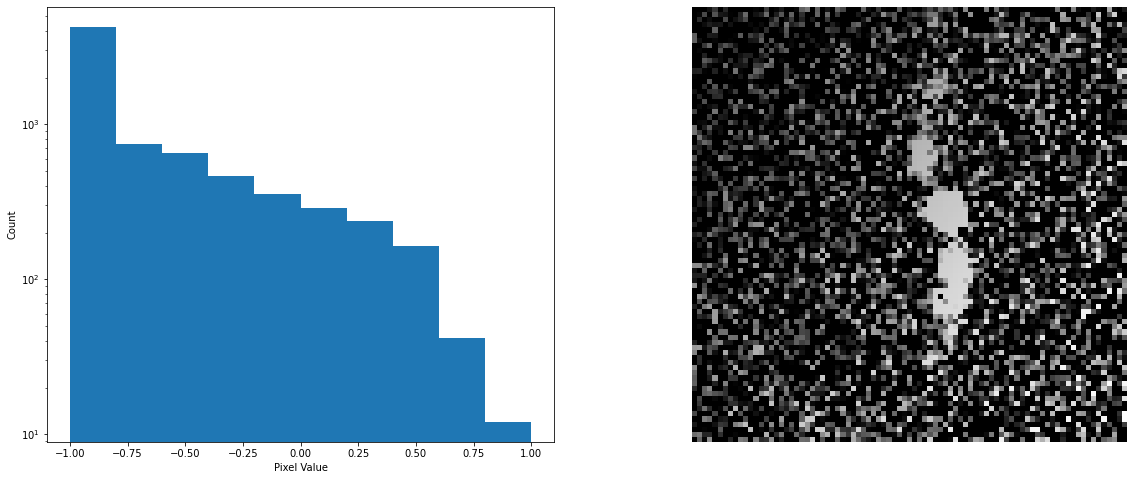

maxima of each image: [1.0]
minima of each image: [-1.0]


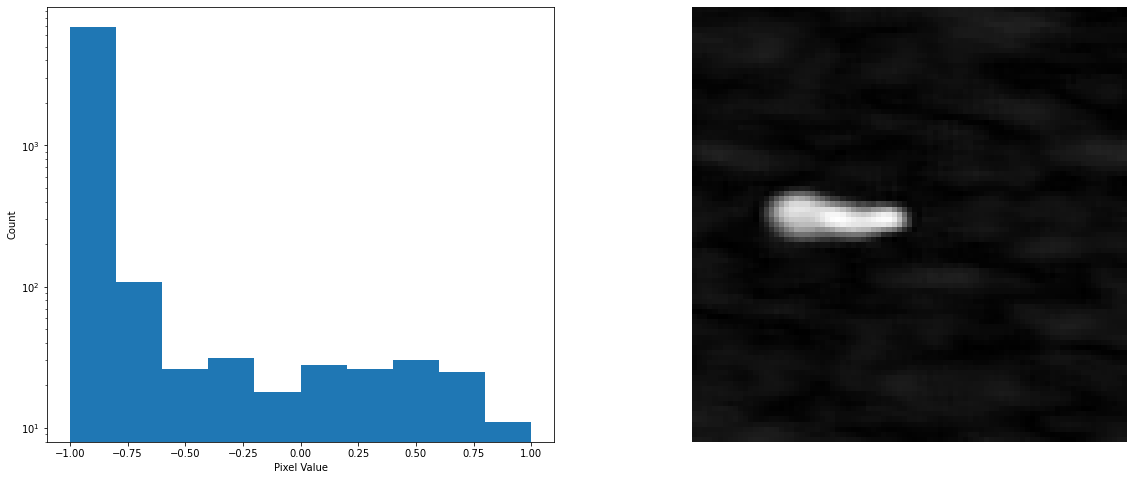

maxima of each image: [1.0]
minima of each image: [-1.0]


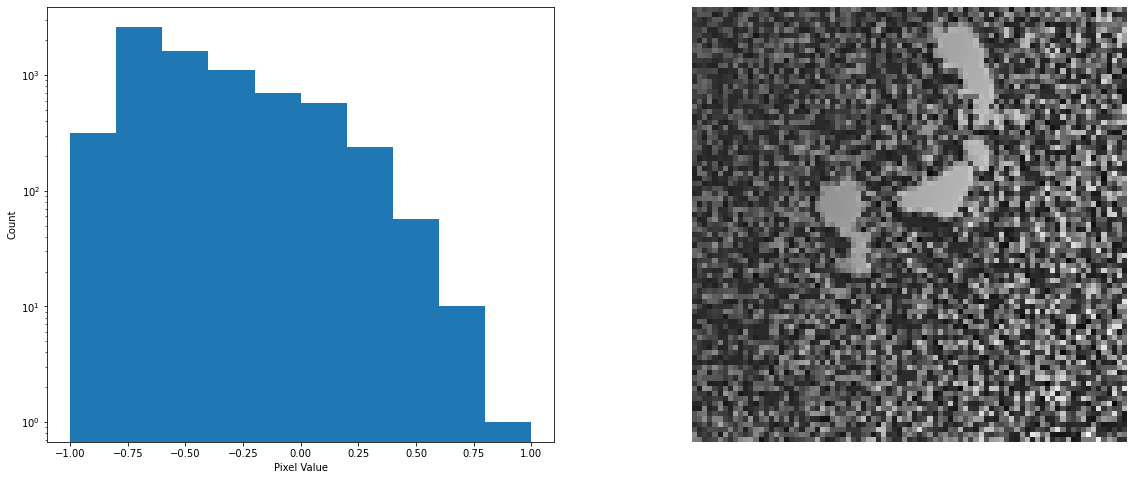

maxima of each image: [1.0]
minima of each image: [-1.0]


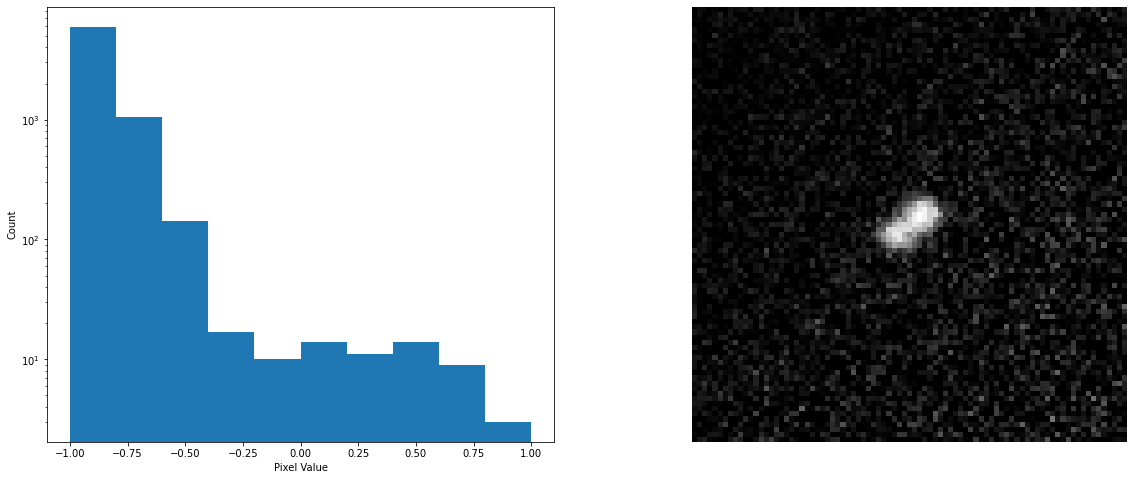

maxima of each image: [1.0]
minima of each image: [-1.0]


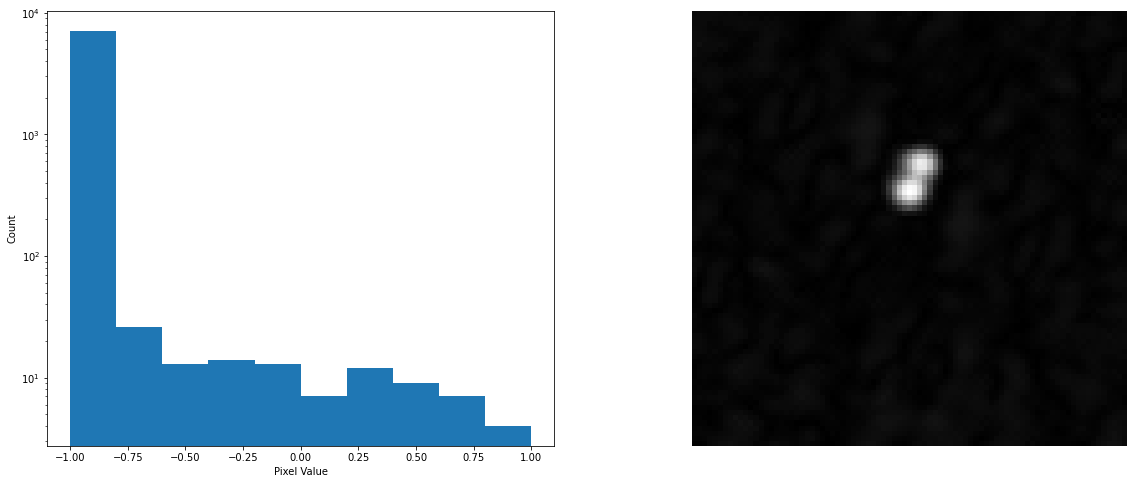

maxima of each image: [1.0]
minima of each image: [-1.0]


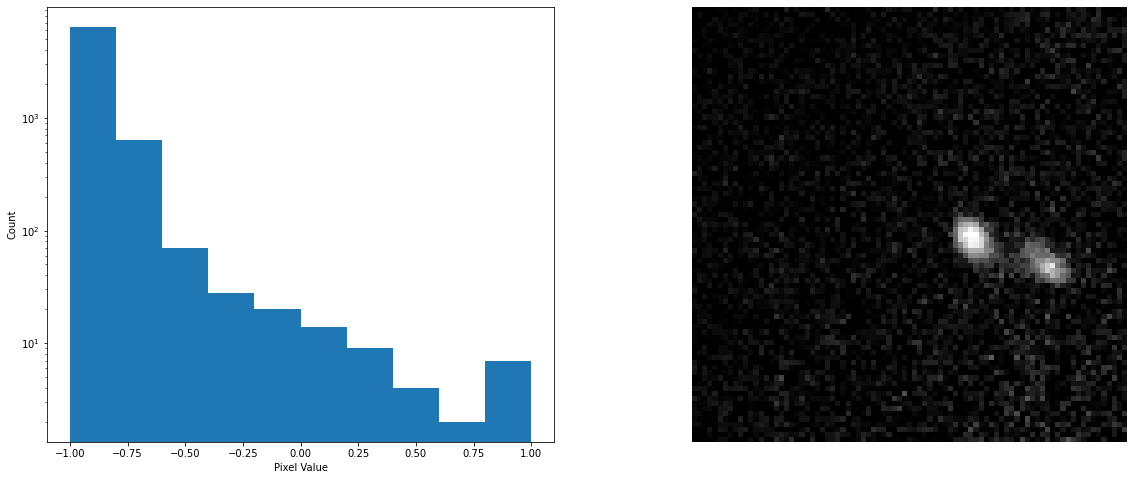

maxima of each image: [1.0]
minima of each image: [-1.0]


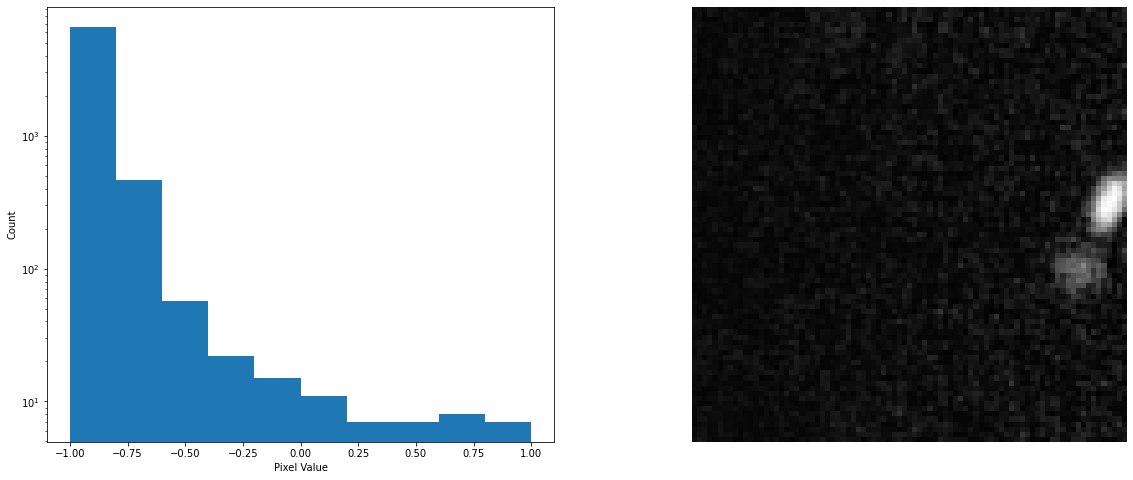

maxima of each image: [1.0]
minima of each image: [-1.0]


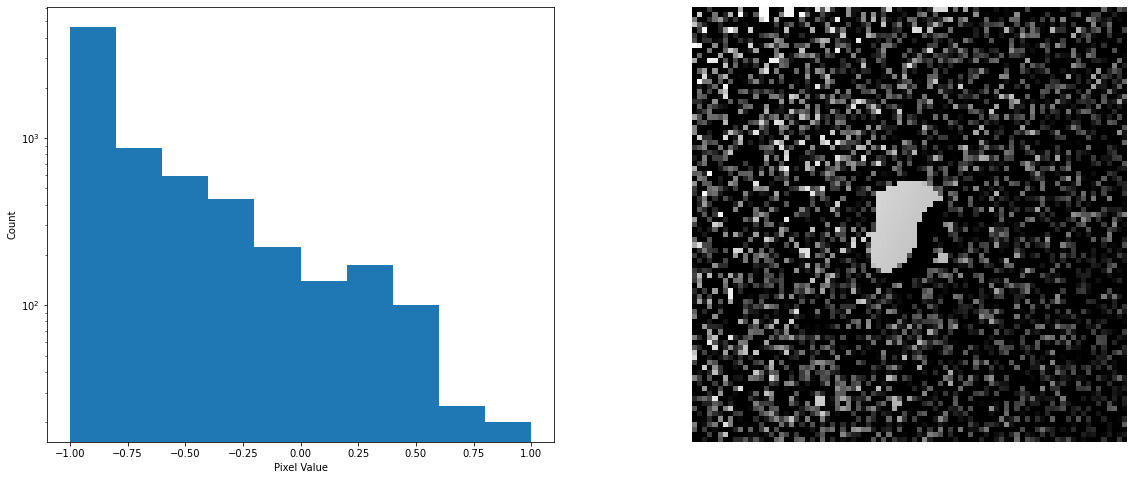

maxima of each image: [1.0]
minima of each image: [-1.0]


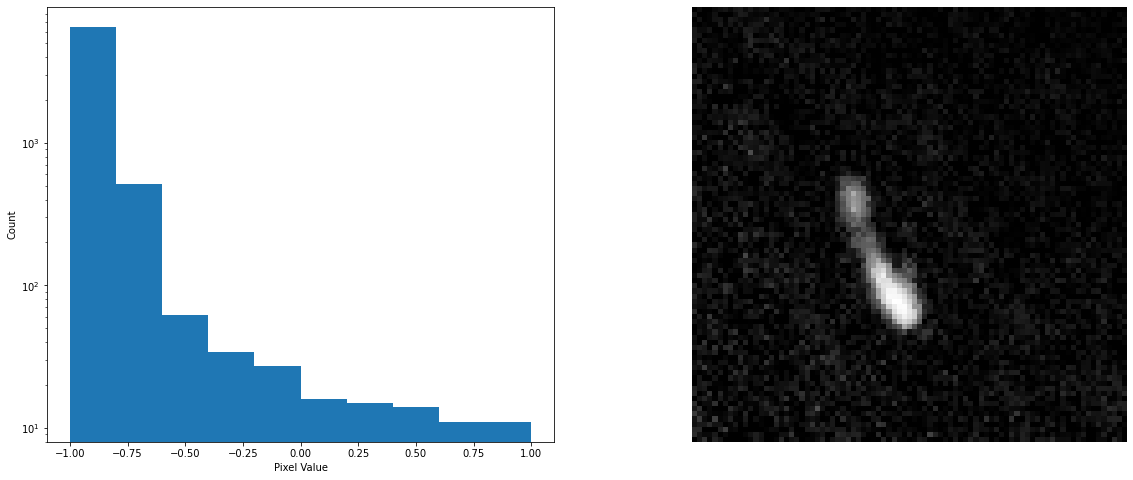

maxima of each image: [1.0]
minima of each image: [-1.0]


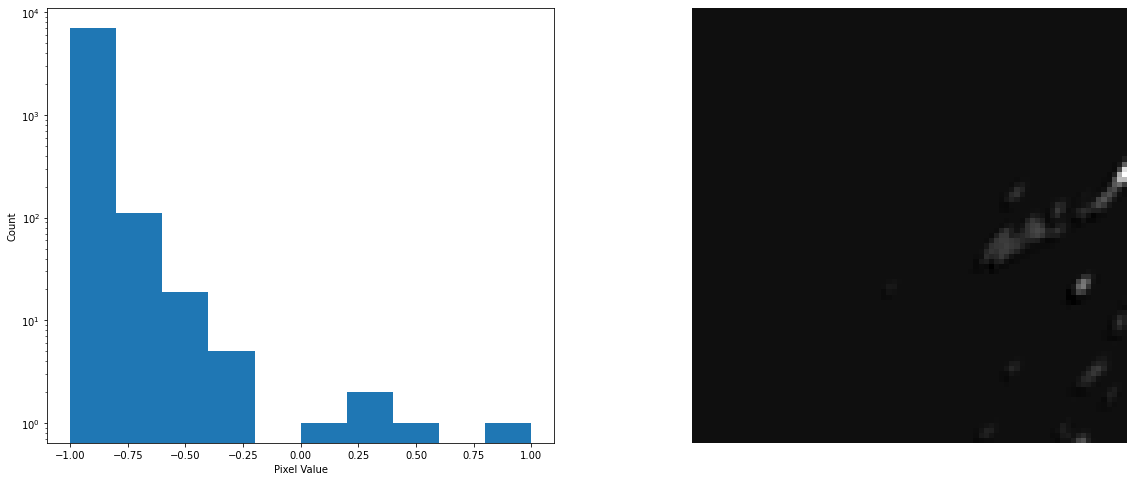

maxima of each image: [1.0]
minima of each image: [-1.0]


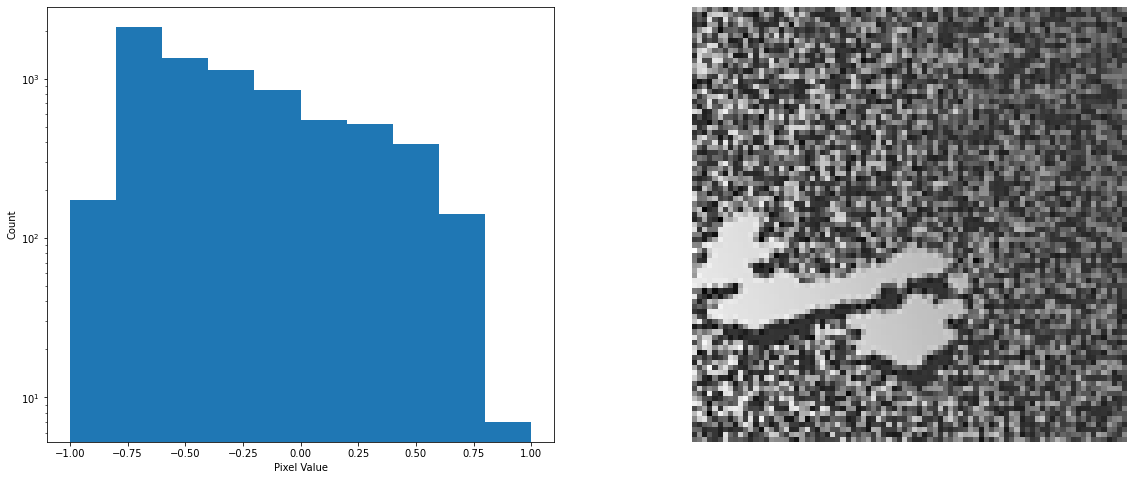

maxima of each image: [1.0]
minima of each image: [-1.0]


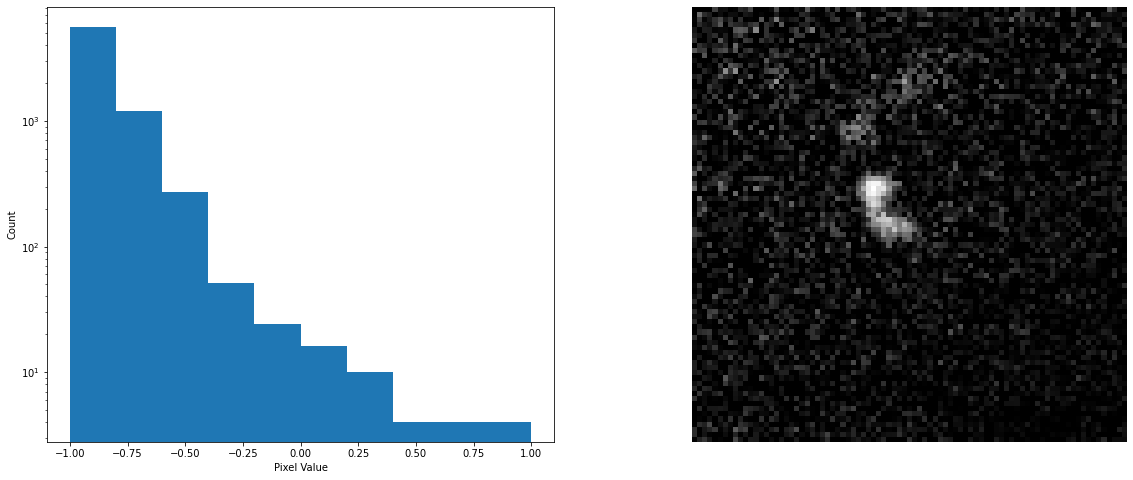

maxima of each image: [1.0]
minima of each image: [-1.0]


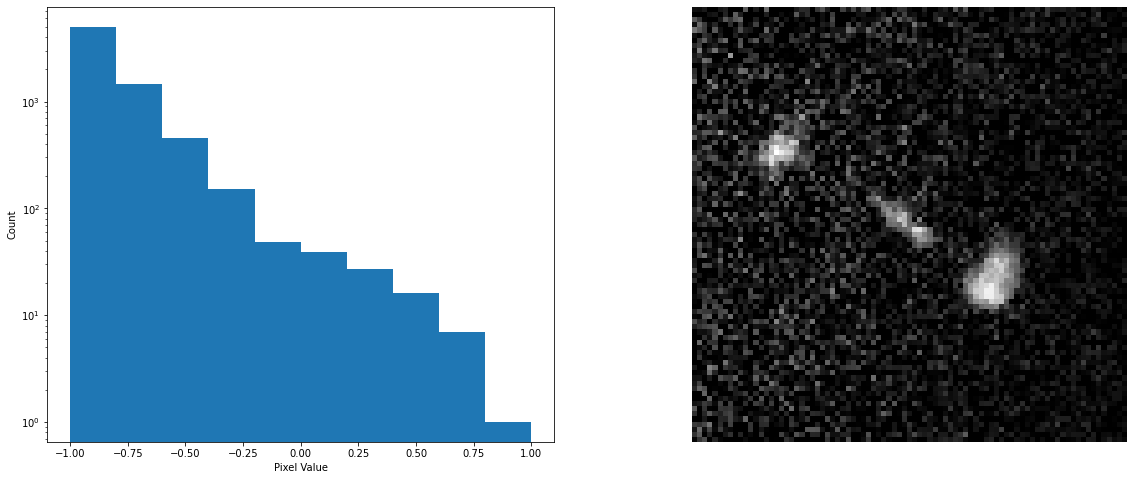

maxima of each image: [1.0]
minima of each image: [-1.0]


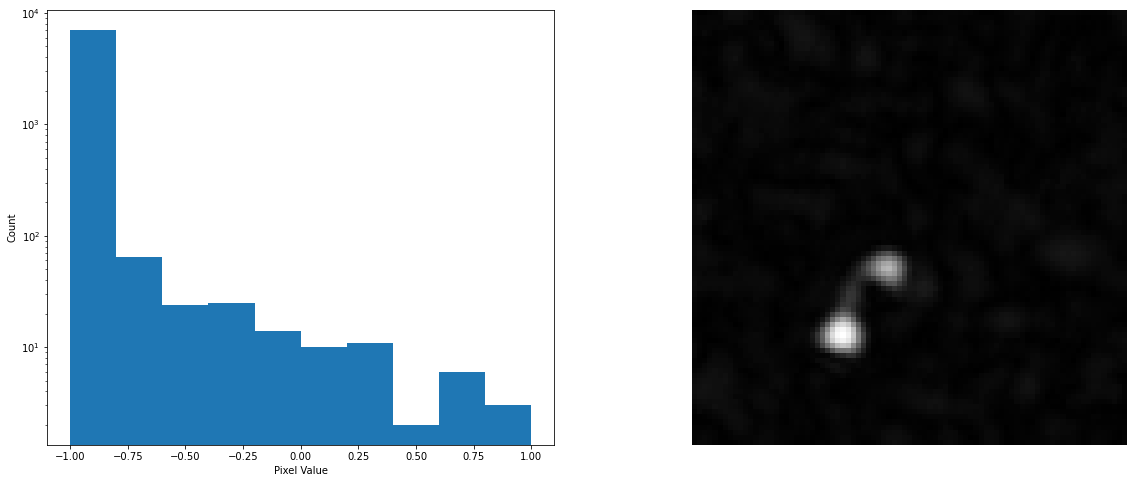

maxima of each image: [1.0]
minima of each image: [-1.0]


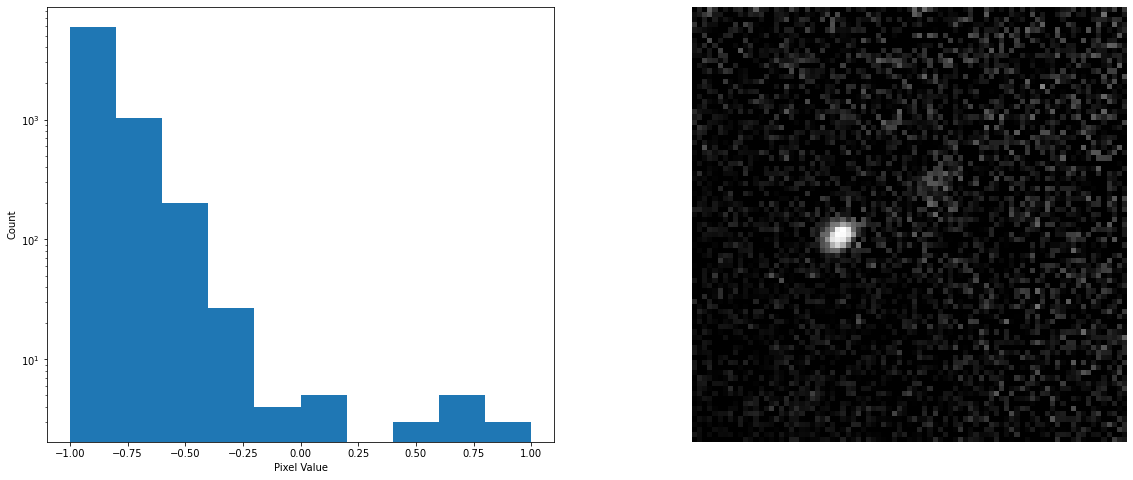

maxima of each image: [1.0]
minima of each image: [-1.0]


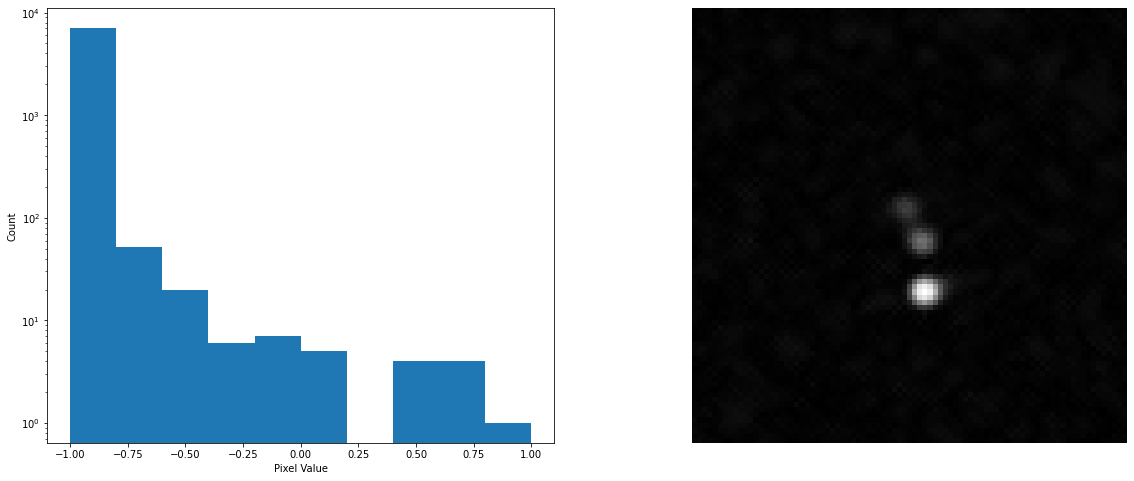

maxima of each image: [1.0]
minima of each image: [-1.0]


In [3]:
transform_no = 0
for image, target in train:
    fig, ax = plt.subplots(1,transform_no+2, figsize=((transform_no+2)*10,8))
    maxima = []
    minima = []
    # Image
    image = np.asarray(image)
    maxima.append(image.max())
    minima.append(image.min())
    ax[0].hist(image.squeeze().flatten())
    ax[0].set_yscale('log')
    ax[0].set_xlabel("Pixel Value")
    ax[0].set_ylabel("Count")

    ax[1].imshow(image.squeeze(), cmap="Greys_r")
    ax[1].axis('off')

    for i in range(transform_no):
        image = transform()(image=image)['image']
        maxima.append(image.max())
        minima.append(image.min())
        ax[i+2].imshow(image.squeeze(), cmap="Greys_r")
        ax[i+2].axis('off')

    plt.show()
    print(f"maxima of each image: {maxima}")
    print(f"minima of each image: {minima}")